# Investigation into the magnitude of DCR effects

## Setup

Import libraries

In [1]:
from __future__ import print_function, division, absolute_import
%matplotlib inline
import calcRefractiveIndex
from calcRefractiveIndex import refraction as refraction
from calcRefractiveIndex import diff_refraction as diff
from calcRefractiveIndex import humidity_to_pressure as humidity_to_pressure
from matplotlib import pyplot as plt
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab

In [ ]:
reload(calcRefractiveIndex)

Define a few helpful functions

In [2]:
def arcsec(var):
    return var * 3600.
def minmax(var):
    return [np.min(var),np.max(var)]

Test the calculation of refraction, and verify the correct spectral index is being used.
Should give:

n_delta = 27978.69

refraction = 20.990

In [3]:
print("n_delta = ",calcRefractiveIndex.n_delta(354., 1., 0.02, 20.))
print("refraction = ",arcsec(refraction(20.,wavelength=354., atmospheric_pressure = 1., water_vapor_pressure = 0.02,
                        temperature = 20. , latitude = -30.244639, altitude = 2663.)))
#print(arcsec(diff(20.,wavelength=354.,bandwidth=66., atmospheric_pressure = 1., 
#                  water_vapor_pressure = 0.02, temperature = 20. , latitude = -30.244639, altitude = 2663.)))

n_delta =  27978.6908907
refraction =  20.9904089373


Define the temperature, pressure, and zenith angle ranges to use

In [4]:
base_temp = 10.
temps=np.array(range(100))/3.
temps = base_temp + temps - np.mean(temps)

base_pressure = 586.7 # mm Hg
base_pressure_atm=base_pressure / 760.

pressure_delta = 0.001
pressure_range = 0.1
pressures = ((np.array(range(1+int(2*pressure_range/pressure_delta)))* pressure_delta - pressure_range /2.) 
            * base_pressure_atm + base_pressure_atm)

angle_delta = 0.5
angle_max = 75.
zenith_angles = np.array(range(1+int(angle_max/angle_delta))) * angle_delta 

humidities = np.array(range(100))+1
base_water_pressures = humidity_to_pressure(humidity=humidities, temperature=15.)

In [5]:
print(base_water_pressures*100)

[ 0.01677896  0.03355792  0.05033688  0.06711584  0.0838948   0.10067376
  0.11745272  0.13423168  0.15101064  0.1677896   0.18456856  0.20134752
  0.21812648  0.23490544  0.2516844   0.26846336  0.28524232  0.30202128
  0.31880024  0.3355792   0.35235816  0.36913712  0.38591608  0.40269504
  0.419474    0.43625295  0.45303191  0.46981087  0.48658983  0.50336879
  0.52014775  0.53692671  0.55370567  0.57048463  0.58726359  0.60404255
  0.62082151  0.63760047  0.65437943  0.67115839  0.68793735  0.70471631
  0.72149527  0.73827423  0.75505319  0.77183215  0.78861111  0.80539007
  0.82216903  0.83894799  0.85572695  0.87250591  0.88928487  0.90606383
  0.92284279  0.93962175  0.95640071  0.97317967  0.98995863  1.00673759
  1.02351655  1.04029551  1.05707447  1.07385343  1.09063239  1.10741135
  1.12419031  1.14096927  1.15774823  1.17452719  1.19130615  1.20808511
  1.22486407  1.24164303  1.25842199  1.27520095  1.29197991  1.30875886
  1.32553782  1.34231678  1.35909574  1.3758747   1

# u band

## 1D plots

Plot the magnitude of DCR as a function of zenith angle, temperature, pressure individually

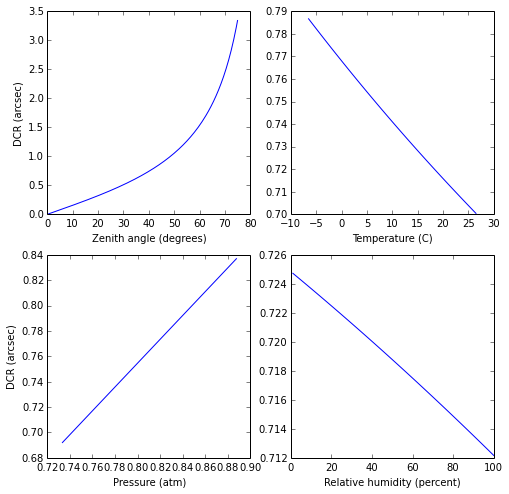

In [6]:
wavelength = 354.
bandwidth = 66.

dcr_za = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, temperature = base_temp, 
            atmospheric_pressure = base_pressure_atm)

dcr_temperature = diff(40., wavelength=wavelength, bandwidth = bandwidth, temperature = temps, 
            atmospheric_pressure = base_pressure_atm)

dcr_pressure= diff(40., wavelength=wavelength, bandwidth = bandwidth, temperature = 15., 
            atmospheric_pressure = pressures)

dcr_water= diff(40., wavelength=wavelength, bandwidth = bandwidth, temperature = 15., 
            atmospheric_pressure = base_pressure_atm - base_water_pressures, 
            water_vapor_pressure = base_water_pressures)

fig=plt.figure(figsize=(8,8))
plot_1 = fig.add_subplot(2,2,1)
plot_2 = fig.add_subplot(2,2,2)
plot_3 = fig.add_subplot(2,2,3)
plot_4 = fig.add_subplot(2,2,4)
za_plot=plot_1.plot(zenith_angles,arcsec(dcr_za))
lx = plot_1.set_xlabel('Zenith angle (degrees)')
ly = plot_1.set_ylabel('DCR (arcsec)')

temperature_plot = plot_2.plot(temps,arcsec(dcr_temperature))
lx = plot_2.set_xlabel('Temperature (C)')
#ly = plot_2.set_ylabel('DCR (arcsec)')

temperature_plot = plot_3.plot(pressures,arcsec(dcr_pressure))
lx = plot_3.set_xlabel('Pressure (atm)')
ly=plot_3.set_ylabel('DCR (arcsec)')

water_plot = plot_4.plot(humidities,arcsec(dcr_water))
lx = plot_4.set_xlabel('Relative humidity (percent)')
#ly = plot_4.set_ylabel('DCR (arcsec)')

## 2D plots

Now create a 3D array of differential refraction amplitudes as a function of zenith angle, temperature, and pressure

In [7]:
wavelength = 354.
bandwidth = 66.
diff_refract_arr = np.zeros([temps.size, zenith_angles.size, pressures.size])
for p_i in range(pressures.size):
    diff_refract_arr[:, :, p_i] = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, 
            temperature = temps, atmospheric_pressure = pressures[p_i])

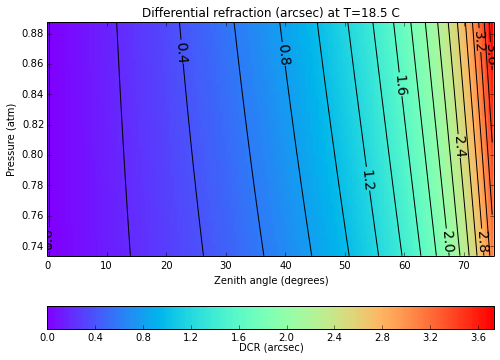

In [70]:
Y = pressures
X = zenith_angles
z_slice = 75
Z = arcsec(diff_refract_arr[z_slice, :, :]).T

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith angle (degrees)')
ax.set_ylabel('Pressure (atm)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at T=' + str(round(temps[z_slice]*100)/100) + ' C')


cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_ZA-Pressure.png',bbox_inches='tight')

plt.show()


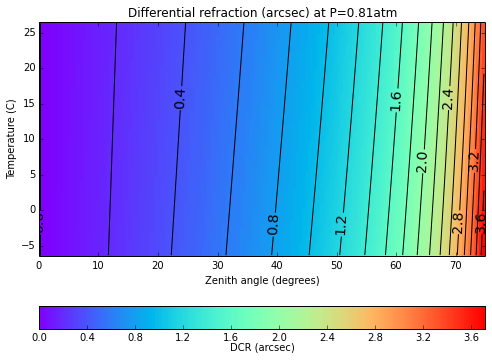

In [69]:
Y = temps
X = zenith_angles
z_slice=100
Z = arcsec(diff_refract_arr[:, :, z_slice])

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith angle (degrees)')
ax.set_ylabel('Temperature (C)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at P=' + str(round(pressures[z_slice]*100)/100) + 'atm')

cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_ZA-Temperature.png',bbox_inches='tight')
plt.show()

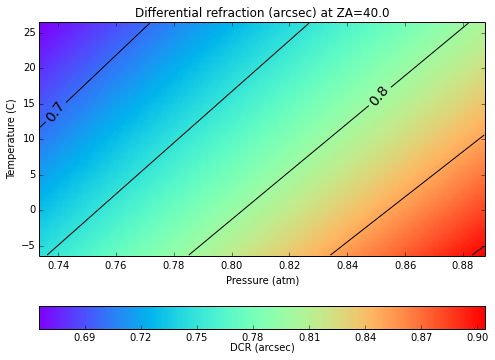

In [68]:
X = pressures
Y = temps
Z = arcsec(diff_refract_arr[:, z_slice, :])
z_slice=80

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.05)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Pressure (atm)')
ax.set_ylabel('Temperature (C)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at ZA=' + str(zenith_angles[z_slice]))

cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_Pressure-Temperature.png',bbox_inches='tight')
plt.show()

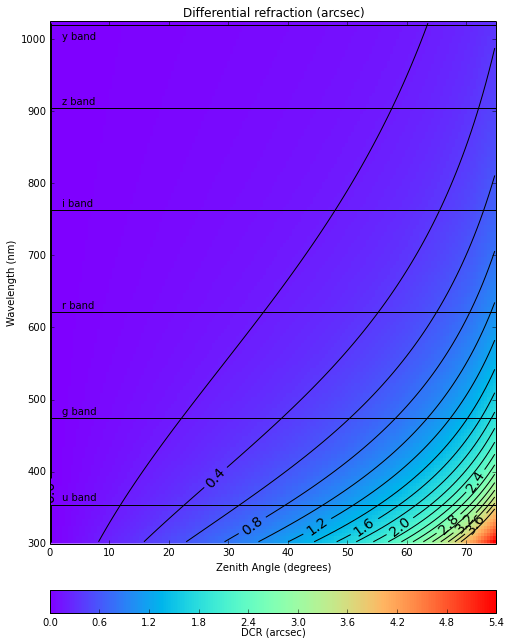

In [67]:
wavelength_delta = 5
wavelength_min = 300.
wavelength_max = 1025.
wavelengths = (np.array(range(1+int((wavelength_max-wavelength_min)/wavelength_delta))) * wavelength_delta + 
    wavelength_min)

bandwidths = wavelengths * 0.2
diff_refract_wavelengths = np.zeros([wavelengths.size, zenith_angles.size])
for w_i in range(wavelengths.size):
    diff_refract_wavelengths[w_i, :] = diff(zenith_angles, wavelength=wavelengths[w_i], bandwidth = bandwidths[w_i], 
            temperature = base_temp, atmospheric_pressure = base_pressure_atm)

X = zenith_angles
Y = wavelengths
Z = arcsec(diff_refract_wavelengths)

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,12))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith Angle (degrees)')
ax.set_ylabel('Wavelength (nm)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 354.0,color='k')
plt.text(2, 360, 'u band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 475.0,color='k')
plt.text(2, 480, 'g band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 622.0,color='k')
plt.text(2, 627, 'r band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 763.0,color='k')
plt.text(2, 768, 'i band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 905.0,color='k')
plt.text(2, 910, 'z band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 1020.0,color='k')
plt.text(2, 1000, 'y band')

ptitle=plt.title('Differential refraction (arcsec)')

#cbaxes = fig.add_axes([0.1, 0.9, 0.0, 0.1])
cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1, pad=0.07)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_ZA-wavelength.png',bbox_inches='tight')
plt.show()

In [90]:
k_B=1.38064852 * 10**-23
m=28.0*1.6749*10**-27
g=9.81
earth_R=6.371*10**6
print(k_B/(m*g*earth_R),0.001254/273.15)

4.71041970734e-06 4.5908841296e-06
